Chargement du dataset Mall_Customers...
 téléchargement depuis GitHub...
--2025-05-07 10:33:51--  https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/plain]
Saving to: ‘Mall_Customers.csv.1’

Mall_Customers.csv. 100%[===================>]   4.19K  --.-KB/s    in 0s      

2025-05-07 10:33:51 (43.1 MB/s) - ‘Mall_Customers.csv.1’ saved [4286/4286]

Aperçu des données Mall_Customers:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Mal

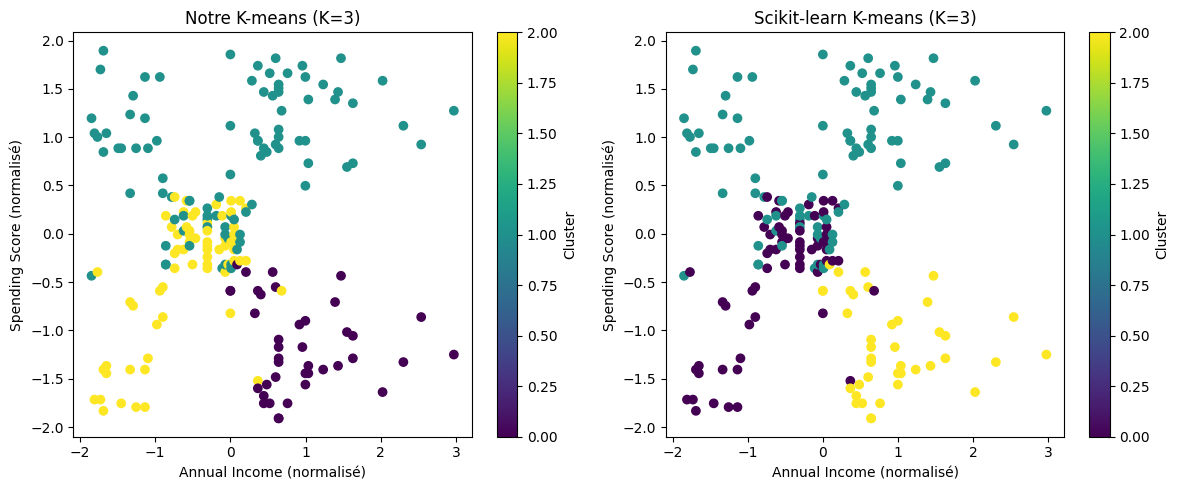


Visualisation des clusters en 3D:


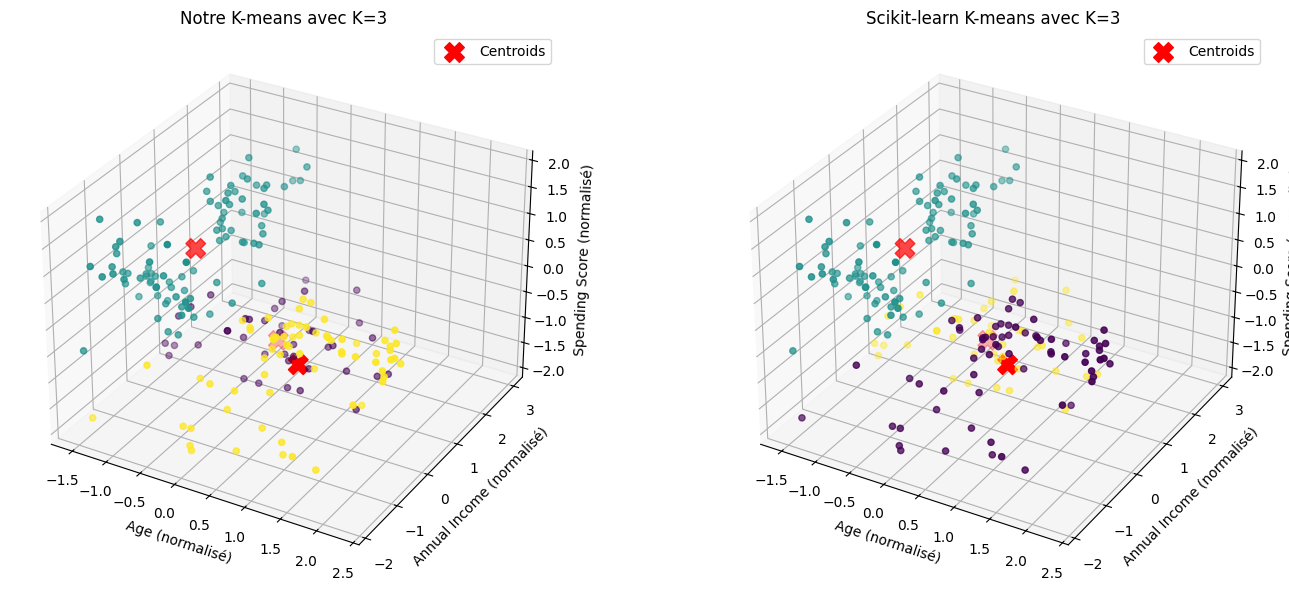


=== Tests avec K = 5 ===

Notre implémentation de K-means:
Inertie: 173.4054

Implémentation scikit-learn de K-means:
Inertie: 173.3737

Quelques résultats de prédiction (format demandé dans le PDF):


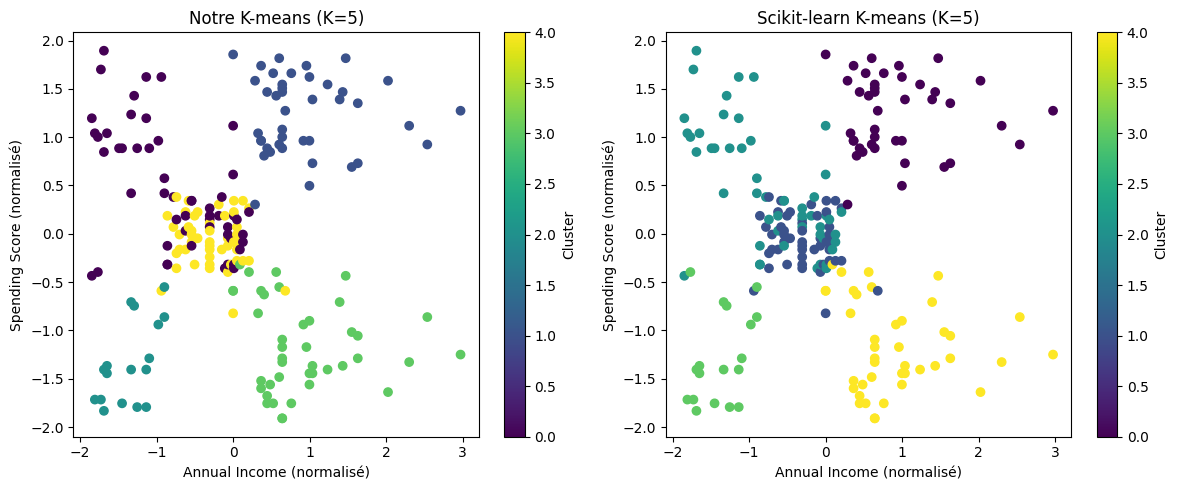


Visualisation des clusters en 3D:


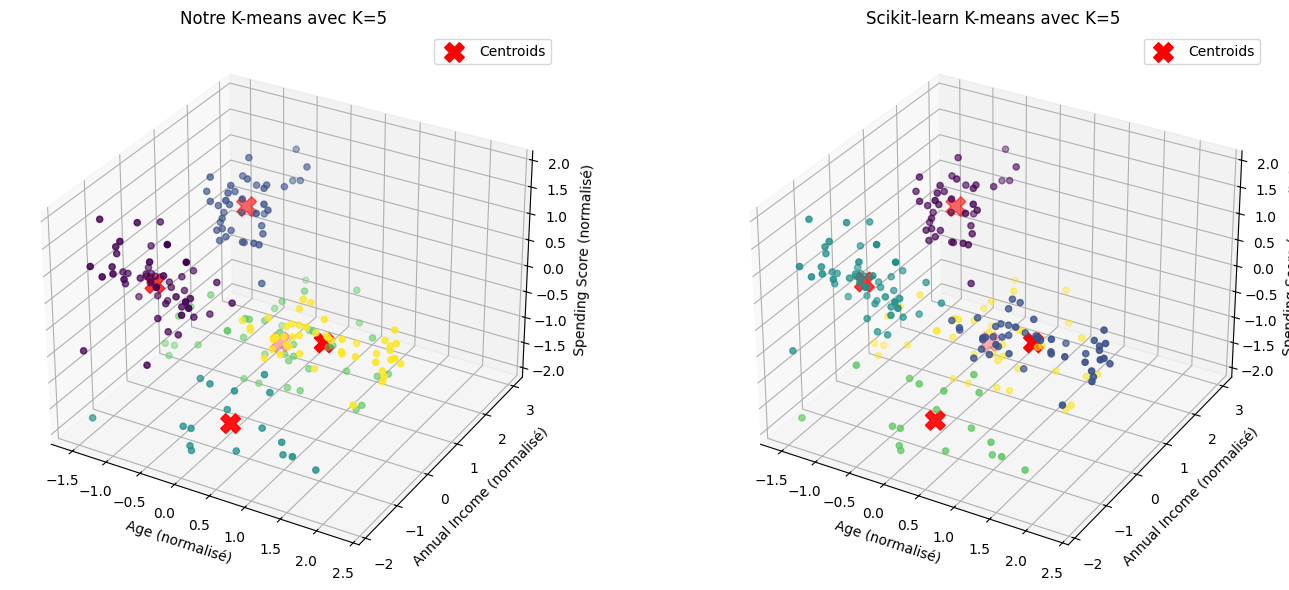


Résumé des résultats:
   K                  Impl     Inertia
0  3         Notre K-means  301.912422
1  3  Scikit-learn K-means  301.912422
2  5         Notre K-means  173.405443
3  5  Scikit-learn K-means  173.373720

Analyse comparative:
Pour K = 3:
  Différence d'Inertie: 0.0000 (négatif = notre implémentation est meilleure)
Pour K = 5:
  Différence d'Inertie: 0.0317 (négatif = notre implémentation est meilleure)

Tableau d'analyse critique:
  Traitement Résultats Notre Implémentation Résultats Scikit-learn  \
0        K=3              Inertia: 301.9124      Inertia: 301.9124   
1        K=5              Inertia: 173.4054      Inertia: 173.3737   

                                 Conclusions  
0  À remplir d'après l'analyse des résultats  
1  À remplir d'après l'analyse des résultats  


In [3]:
# mall_customers_clustering.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.impute import SimpleImputer


class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4, random_state=None):
        """
        Initialize KMeans algorithm.

        Parameters:
        -----------
        n_clusters : int, default=3
            Number of clusters to form.
        max_iter : int, default=100
            Maximum number of iterations of the algorithm.
        tol : float, default=1e-4
            Relative tolerance with regards to inertia to declare convergence.
        random_state : int, default=None
            Seed for random number generator.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = None

    def fit(self, X):
        """
        Compute k-means clustering.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training instances to cluster.

        Returns:
        --------
        self : object
            Fitted estimator.
        """
        # Set random state for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Get dimensions of data
        n_samples, n_features = X.shape

        # Initialize centroids by randomly selecting from data points
        # Following Algorithm 1 in the PDF, line 1
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        # Initialize labels
        old_labels = np.zeros(n_samples)

        # Iterative algorithm (lines 2-8 in Algorithm 1)
        for iteration in range(self.max_iter):
            # Calculate distances between all points and all centroids
            distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))

            # Assign each point to the nearest centroid (line 4)
            self.labels_ = np.argmin(distances, axis=1)

            # Check for convergence (if labels haven't changed)
            if np.all(old_labels == self.labels_):
                break

            old_labels = self.labels_.copy()

            # Update centroids based on new cluster assignments (line 6)
            for k in range(self.n_clusters):
                if np.sum(self.labels_ == k) > 0:  # Avoid empty clusters
                    self.centroids[k] = np.mean(X[self.labels_ == k], axis=0)

        # Calculate inertia (sum of squared distances to closest centroid)
        # This corresponds to J in equation (1) of the PDF
        self.inertia_ = 0
        for k in range(self.n_clusters):
            cluster_points = X[self.labels_ == k]
            if len(cluster_points) > 0:
                self.inertia_ += np.sum((cluster_points - self.centroids[k]) ** 2)

        return self

    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            New data to predict.

        Returns:
        --------
        labels : array of shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        # Calculate distances between all points and all centroids
        distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))

        # Return cluster index for each point
        return np.argmin(distances, axis=1)

# 1. Charger le dataset Mall_Customers
print("Chargement du dataset Mall_Customers...")

print(" téléchargement depuis GitHub...")
!wget https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv
df = pd.read_csv("Mall_Customers.csv")

# Afficher les informations sur le dataset
print("Aperçu des données Mall_Customers:")
print(df.head())
print(f"Dimensions du dataset: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")
print(df.info())
print(df.describe())

# 2. Introduire artificiellement des valeurs manquantes comme demandé dans le PDF
print("\nIntroduction artificielle de valeurs manquantes...")
df.loc[5:10, "Age"] = np.nan
df.loc[15:20, "Annual Income (k$)"] = np.nan

print("Nombre de valeurs manquantes après modification:")
print(df.isnull().sum())

# 3. Imputer les valeurs manquantes avec la moyenne
print("\nImputation des valeurs manquantes avec la moyenne...")
imputer = SimpleImputer(strategy="mean")

# Sélectionner les colonnes numériques pour l'imputation
df[["Age", "Annual Income (k$)"]] = imputer.fit_transform(df[["Age", "Annual Income (k$)"]])

print("Nombre de valeurs manquantes après imputation:")
print(df.isnull().sum())

# 4. Sélectionner les variables numériques pour le clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

# 5. Normaliser les données
print("\nNormalisation des données...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Sélectionner deux valeurs de K pour l'entraînement
# Pour Mall_Customers, essayons K=3 et K=5 (comme suggéré dans le PDF)
k_values = [3, 5]

# 7. Entrainer les modèles et évaluer les performances pour chaque K
results = []

for k in k_values:
    print(f"\n=== Tests avec K = {k} ===")

    # A. Notre implémentation de K-means
    print("\nNotre implémentation de K-means:")
    custom_model = KMeans(n_clusters=k, random_state=42, max_iter=100)
    custom_model.fit(X_scaled)
    custom_pred = custom_model.labels_

    # Calculer l'inertie
    custom_inertia = custom_model.inertia_
    print(f"Inertie: {custom_inertia:.4f}")

    # B. Implémentation scikit-learn de K-means
    print("\nImplémentation scikit-learn de K-means:")
    sklearn_model = SKLearnKMeans(n_clusters=k, random_state=42, n_init=10)
    sklearn_model.fit(X_scaled)
    sklearn_pred = sklearn_model.labels_

    # Calculer l'inertie
    sklearn_inertia = sklearn_model.inertia_
    print(f"Inertie: {sklearn_inertia:.4f}")

    # Stocker les résultats
    results.append({
        'K': k,
        'Impl': 'Notre K-means',
        'Inertia': custom_inertia
    })
    results.append({
        'K': k,
        'Impl': 'Scikit-learn K-means',
        'Inertia': sklearn_inertia
    })

    # 8. Quelques résultats de prédiction (format demandé dans le PDF)
    print("\nQuelques résultats de prédiction (format demandé dans le PDF):")

    # Notre implémentation
    predictions = custom_model.predict(X_scaled)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=predictions)  # Annual Income vs Spending Score
    plt.title(f"Notre K-means (K={k})")
    plt.xlabel("Annual Income (normalisé)")
    plt.ylabel("Spending Score (normalisé)")
    plt.colorbar(label='Cluster')

    # Scikit-learn
    predictions_sklearn = sklearn_model.predict(X_scaled)
    plt.subplot(1, 2, 2)
    plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=predictions_sklearn)
    plt.title(f"Scikit-learn K-means (K={k})")
    plt.xlabel("Annual Income (normalisé)")
    plt.ylabel("Spending Score (normalisé)")
    plt.colorbar(label='Cluster')

    plt.tight_layout()
    plt.savefig(f'mall_customers_simple_predictions_k{k}.png')
    plt.show()

    # 9. Visualiser les clusters et les centroïdes en 3D
    print("\nVisualisation des clusters en 3D:")

    fig = plt.figure(figsize=(15, 6))

    # Notre implémentation
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=custom_pred, cmap='viridis')
    ax1.scatter(custom_model.centroids[:, 0], custom_model.centroids[:, 1], custom_model.centroids[:, 2],
                c='red', marker='X', s=200, label='Centroids')
    ax1.set_title(f'Notre K-means avec K={k}')
    ax1.set_xlabel('Age (normalisé)')
    ax1.set_ylabel('Annual Income (normalisé)')
    ax1.set_zlabel('Spending Score (normalisé)')
    ax1.legend()

    # Scikit-learn
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=sklearn_pred, cmap='viridis')
    ax2.scatter(sklearn_model.cluster_centers_[:, 0], sklearn_model.cluster_centers_[:, 1],
                sklearn_model.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
    ax2.set_title(f'Scikit-learn K-means avec K={k}')
    ax2.set_xlabel('Age (normalisé)')
    ax2.set_ylabel('Annual Income (normalisé)')
    ax2.set_zlabel('Spending Score (normalisé)')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(f'mall_customers_3d_clusters_k{k}.png')
    plt.show()

# 10. Résumé des résultats
results_df = pd.DataFrame(results)
print("\nRésumé des résultats:")
print(results_df)

# 11. Comparer les performances des deux implémentations
print("\nAnalyse comparative:")

# Calculer les différences de performance
for k in k_values:
    custom_results = results_df[(results_df['K'] == k) & (results_df['Impl'] == 'Notre K-means')]
    sklearn_results = results_df[(results_df['K'] == k) & (results_df['Impl'] == 'Scikit-learn K-means')]

    inertia_diff = custom_results['Inertia'].values[0] - sklearn_results['Inertia'].values[0]

    print(f"Pour K = {k}:")
    print(f"  Différence d'Inertie: {inertia_diff:.4f} (négatif = notre implémentation est meilleure)")

# 12. Tableau d'analyse critique
critique_data = {
    'Traitement': ['K=3', 'K=5'],
    'Résultats Notre Implémentation': [
        f"Inertia: {results_df[(results_df['K'] == 3) & (results_df['Impl'] == 'Notre K-means')]['Inertia'].values[0]:.4f}",
        f"Inertia: {results_df[(results_df['K'] == 5) & (results_df['Impl'] == 'Notre K-means')]['Inertia'].values[0]:.4f}"
    ],
    'Résultats Scikit-learn': [
        f"Inertia: {results_df[(results_df['K'] == 3) & (results_df['Impl'] == 'Scikit-learn K-means')]['Inertia'].values[0]:.4f}",
        f"Inertia: {results_df[(results_df['K'] == 5) & (results_df['Impl'] == 'Scikit-learn K-means')]['Inertia'].values[0]:.4f}"
    ],
    'Conclusions': [
        "À remplir d'après l'analyse des résultats",
        "À remplir d'après l'analyse des résultats"
    ]
}

critique_df = pd.DataFrame(critique_data)
print("\nTableau d'analyse critique:")
print(critique_df)
